In [17]:
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [18]:
data = pd.read_csv('volcanes.csv')

In [19]:
data.head(28)

Nombre                    Estado  Altitud  \
0                Citlalt�petl         Veracruz�y�Puebla     5747   
1                Popocat�petl  M�xico,�Puebla�y�Morelos     5500   
2                Iztacc�huatl           M�xico�y�Puebla     5230   
3                 Xinant�catl          Estado de M�xico     4690   
4                 La Malinche         Puebla�y�Tlaxcala     4420   
5             Cofre de Perote                  Veracruz     4282   
6            Nevado de Colima                   Jalisco     4260   
7                 Las Cumbres                    Puebla     3940   
8                  Jocotitlan          Estado de M�xico     3900   
9                      Colima          Colima�y�Jalisco     3880   
10       Michoac�n-Guanajuato    Guanajuato�y�Michoac�n     3860   
11                  La Gloria                    Puebla     3600   
12                     Papayo                  Guerrero     3600   
13   Zitacuaro-Valle de Bravo                 Michoac�n     3500   
14            Serdan-Oriental                    Puebla     3485   
15            Las Derrumbadas                    Puebla     3400   
16                   Xihuingo                   Hidalgo     3240   
17                Los Humeros                    Puebla     3150   
18                      Xitle          Distrito Federal     3100   
19                  Paricut�n                 Michoac�n     2800   
20  Mascota (campo volc�nico)                   Jalisco     2540   
21                 Sangang�ey                   Nayarit     2353   
22                   Ceboruco                   Nayarit     2280   
23                   Naolinco                  Veracruz     2000   
24          San Mart�n Tuxtla                  Veracruz     1650   
25                    Jorullo                 Michoac�n     1330   
26                  Chichonal                   Chiapas     1060   

                     Clasificaci�n        x       y  
0                    Estratovolc�n  -97.160  19.020  
1                    Estratovolc�n  -98.700  19.308  
2                    Estratovolc�n  -98.380  19.110  
3                    Estratovolc�n  -99.758  19.108  
4                    Estratovolc�n  -98.020  19.140  
5                 Volc�n en escudo  -97.150  19.492  
6                    Estratovolc�n -103.608  19.563  
7                    Estratovolc�n  -97.270  19.150  
8                    Estratovolc�n  -99.757  19.724  
9                    Estratovolc�n -103.620  19.510  
10                             NaN -101.750  19.850  
11                 Campo volc�nico  -97.250  19.330  
12                   Estratovolc�n  -98.700  19.308  
13                   Estratovolc�n -100.250  19.400  
14                   Estratovolc�n  -97.470  19.270  
15                             NaN   97.280  19.180  
16                             NaN  -98.530  19.810  
17                             NaN  -97.450  19.680  
18                  Cono de ceniza  -99.250  19.200  
19                   Estratovolc�n -102.200  19.500  
20                 Campo Volc�nico -104.830  20.620  
21                   Estratovolc�n -104.730  21.450  
22                   Estratovolc�n -104.508  21.125  
23                 Campo volc�nico  -96.750  19.670  
24                   Estratovolc�n  -95.320  18.570  
25                 Cono de escoria -102.250  19.480  
26  Caldera Volc�nica-Domo de Lava  -93.200  17.330

In [20]:
maximum = data['Altitud'].max()
minimum = data['Altitud'].min()

maximum, minimum

(5747, 1060)

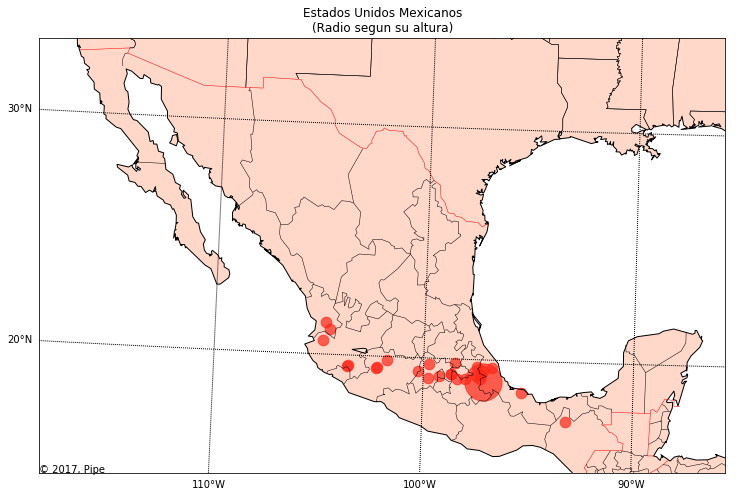

In [21]:

f, ax = plt.subplots(figsize=(20,8))
ax.set_title('Estados Unidos Mexicanos\n(Radio segun su altura)')
m = Basemap (lat_0=10.,lat_1=3,lon_0=-60.,llcrnrlon=-118.,llcrnrlat=14.,urcrnrlon=-86.,urcrnrlat=34.,resolution='l',projection='lcc')

m.drawparallels(np.arange(10,40,10),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-80,10),labels=[0,0,0,1])
m.drawcoastlines()
m.drawcountries(color = 'red')
m.drawstates()
m.fillcontinents(color='coral', alpha=0.3)
for x,y,alt in zip(data['x'].values, data['y'].values, data['Altitud']):
    lng,lat=m(x,y)
    m.scatter(lng,lat, s=np.pi * (6 + (alt-minimum)/(maximum-minimum)*15)**2, marker='o', c='red', alpha=0.7)
ax.annotate(u'\N{COPYRIGHT SIGN} 2017, Pipe', (0, 0))
f.savefig('Volcanes de la Republica Mexicana', dpi=72, transparent=False, bbox_inches='tight')
plt.show()



In [22]:
import folium

In [26]:
#se le asigna un bucle en el cual en vez de hacerlo manualmente este lo haga por medio del bucle.
map_2 = folium.Map(location=[23, -102],zoom_start=4,tiles='Stamen Terrain')

for x,y,alt,nom in zip(data['x'].values, data['y'].values, data['Altitud'], data['Nombre'].values):
    lng,lat=(x,y)
    folium.Marker([lat,lng],popup='Nombre;Altitud').add_to(map_2) 

    map_2.save("map_2.html")
